In [5]:
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'
import keras
import matplotlib.pyplot as plt
from keras.datasets import mnist
import pandas as pd

In [6]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

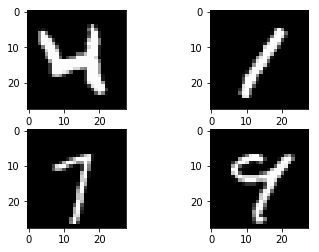

In [7]:
plt.subplot(221)
plt.imshow(X_train[20], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[23], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[42], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[54], cmap=plt.get_cmap('gray'))
plt.show()

In [29]:
X_train.shape
# 60,000 images of 28x28 pixels

(60000, 28, 28)

In [8]:
pd_image = pd.DataFrame([list(l) for l in X_train[0]])
pd_image

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,...,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,...,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,...,0,0,0,0,0,0,0,0,0,0


In [9]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

In [10]:
seed = 10212010
np.random.seed(seed)

In [11]:
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
num_pixels

784

In [12]:
# 'Flattens' each image 
X_train_flatten = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test_flatten = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [13]:
print(X_train_flatten.shape)
print(X_test_flatten.shape)

(60000, 784)
(10000, 784)


In [14]:
# normalize inputs from 0-255 to 0-1. This is for optimizer to converge faster.
X_train_flatten = X_train_flatten / 255
X_test_flatten = X_test_flatten / 255

In [30]:
y_train.shape

(60000,)

In [15]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]


In [16]:
y_train.shape

(60000, 10)

In [17]:
fullyconnected_model = Sequential() 

A **Dense Layer** takes a few parameters as input. <br/><br/>
**output_dim**: The output dimension of the Dense Layer. In this case, I am using 512. You can think of this as the number of neurons in a layer.<br/><br/>
**init**: The initialization function for the weights of the layer.<br/><br/>
**activation**: The activation function to be used in the layer. A few options are: relu, tanh, sigmoid, linear, softmax. See https://keras.io/activations/ for more details.<br/><br/>
**input_dim**: The shape of the input array. In this case, it will be 784 (28*28)


In [18]:
# Dense Layer 1
fullyconnected_model.add(Dense(512, input_dim=num_pixels, init='normal', activation = 'relu', name='layer_uno'))


/Users/robshlee/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(512, input_dim=784, activation="relu", name="layer_uno", kernel_initializer="normal")`
  


In [19]:
# Dense Layer 2
fullyconnected_model.add(Dense(num_classes, init='normal', activation='softmax', name='layer_dos'))

/Users/robshlee/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(10, activation="softmax", name="layer_dos", kernel_initializer="normal")`
  


A Keras model needs to be compiled.<br/><br/>
A Loss function is an error metric to be minimized. There are a few metrics available in Keras.<br/>
-mean_squared_error, mean_absolute_percentage_error, hinge, categorical cross entropy, etc<br/><br/>
There are **Optimizers** available in Keras. We are using the Adam in this example.

In [20]:
fullyconnected_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Keras uses scikit-learn style methods to perform training and inference.<br/><br/>
A **Fit** function takes the following as input,<br/><br/>
-training dataset<br/>
-training labels<br/>
-validation_data (should be tuple with validation data and labels)<br/>
-number of epochs<br/>
-batchsize (number of samples per gradient update)<br/>
-verbosity (0 for no logging to stdout, 1 for progress bar logging, 2 for one log line per epoch).

In [25]:
X_train_flatten[1]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [24]:
len(X_train_flatten)

60000

In [21]:
fullyconnected_model.fit(X_train_flatten, y_train, validation_data=(X_test_flatten, y_test), nb_epoch=10, batch_size=200, verbose=2
)

/Users/robshlee/anaconda3/lib/python3.6/site-packages/keras/models.py:939: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 3s - loss: 0.3148 - acc: 0.9131 - val_loss: 0.1634 - val_acc: 0.9546
Epoch 2/10
 - 3s - loss: 0.1290 - acc: 0.9628 - val_loss: 0.1030 - val_acc: 0.9697
Epoch 3/10
 - 3s - loss: 0.0863 - acc: 0.9752 - val_loss: 0.0817 - val_acc: 0.9756
Epoch 4/10
 - 3s - loss: 0.0618 - acc: 0.9824 - val_loss: 0.0768 - val_acc: 0.9762
Epoch 5/10
 - 3s - loss: 0.0474 - acc: 0.9864 - val_loss: 0.0681 - val_acc: 0.9785
Epoch 6/10
 - 3s - loss: 0.0351 - acc: 0.9907 - val_loss: 0.0635 - val_acc: 0.9806
Epoch 7/10
 - 3s - loss: 0.0274 - acc: 0.9932 - val_loss: 0.0631 - val_acc: 0.9799
Epoch 8/10
 - 3s - loss: 0.0223 - acc: 0.9942 - val_loss: 0.0596 - val_acc: 0.9816
Epoch 9/10
 - 3s - loss: 0.0163 - acc: 0.9965 - val_loss: 0.0688 - val_acc: 0.9788
Epoch 10/10
 - 3s - loss: 0.0129 - acc: 0.9973 - val_loss: 0.0597 - val_acc: 0.9817


# A Convolutional Neural Network
Now that we have created a benchmark, we turn to CNNs to build our classifier.<br/><br/>
Most of the innovations that have happened in computer vision in the past few years are due to using CNNs for image processing.

In [52]:
# Image from Adam Geitgey's blog
# from IPython.display import Image
# Image(filename='FeedForward Image.png')

## Translation Invariance
A Fully Connected Neural Network doesn't understand that moving an object in a picture doesn't make it different. We need to give a Neural Network **Translation Invariance**.<br/><br/>
Convolution is the way to do this. It can be achieved in 4 steps.<br/><br/>
### Step 1
-break image into overlapping image tiles and pass sliding window on the entire image.<br/><br/>
-Save result as a seperate, tiny picture tile

In [54]:
# from IPython.display import Image
# Image(filename='tiled_image.png')

### Step 2
-Feed each image tile into a small neural network. In Feed Forward Neural Network<br/><br/>
-Entire image was fed into one neural network. In this approach we will do it for every image tile<br/><br/>
-Weights/Gradients will be shared for every single tile in the image.

### Step 3
We don't want to lose track of the arrangement on the original tiles. So we save result from the processing tile into same grid arrangement.

### Step 4
-Reduce the size of output array by doing downsampling<br/><br/>
-Maxpooling is used for downsampling<br/><br/>
-You look at a 2x2 square of the array and keep the biggest number

---

In [55]:
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K

(**A Note**: image ordering is different in Tensorflow and Theano. Theano uses nb_sample, channels, height, width. Tensorflow uses nb_sample, height, width, channels if your model doesn't converge, then check image_dim_ordering.)

In [56]:
K.set_image_dim_ordering('tf')

Since our images are gray scale and the conv2D operation needs a 4D tensor as input (samples, rows, cols, channel), we need to reshape our input data.

In [57]:
batch_size = 200
nb_classes = 10 #target number of classes
nb_epoch = 10

# input image dimensions
img_rows, img_cols = 28, 28

# number of convolutional filters to use
nb_filters = 32

# size of pooling area for max pooling
pool_size = (2, 2)

# convolution kernal size
kernal_size = (3, 3) #size of 'moving tile'. RBG=(3, 3, 3)


In [58]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# reshape to be (samples|width|height|channels)
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1).astype('float32')


In [59]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [60]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]


Convolution operator for filtering windows of two-dimensional inputs.

In [62]:
cnn_model = Sequential()
cnn_model.add(Convolution2D(nb_filters, kernal_size[0], kernal_size[1], border_mode='valid', input_shape=(img_rows, img_cols, 1)))
cnn_model.add(Activation('relu'))
cnn_model.add(MaxPooling2D(pool_size=pool_size))
cnn_model.add(Dropout(0.2))
cnn_model.add(Flatten())
cnn_model.add(Dense(128))
cnn_model.add(Activation('relu'))
cnn_model.add(Dense(num_classes))
cnn_model.add(Activation('softmax'))

/Users/robshlee/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1..., padding="valid")`
  


In [64]:
cnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [66]:
cnn_model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=10, batch_size=batch_size, verbose=2)

/Users/robshlee/anaconda3/lib/python3.6/site-packages/keras/models.py:844: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  class_weight=None,


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
33s - loss: 0.2868 - acc: 0.9215 - val_loss: 0.0944 - val_acc: 0.9735
Epoch 2/10
31s - loss: 0.0889 - acc: 0.9735 - val_loss: 0.0627 - val_acc: 0.9803
Epoch 3/10
33s - loss: 0.0620 - acc: 0.9814 - val_loss: 0.0551 - val_acc: 0.9820
Epoch 4/10
32s - loss: 0.0501 - acc: 0.9849 - val_loss: 0.0465 - val_acc: 0.9859
Epoch 5/10
32s - loss: 0.0410 - acc: 0.9874 - val_loss: 0.0474 - val_acc: 0.9843
Epoch 6/10
30s - loss: 0.0341 - acc: 0.9894 - val_loss: 0.0427 - val_acc: 0.9862
Epoch 7/10
32s - loss: 0.0278 - acc: 0.9910 - val_loss: 0.0473 - val_acc: 0.9850
Epoch 8/10
31s - loss: 0.0242 - acc: 0.9927 - val_loss: 0.0373 - val_acc: 0.9876
Epoch 9/10
32s - loss: 0.0192 - acc: 0.9941 - val_loss: 0.0421 - val_acc: 0.9857
Epoch 10/10
30s - loss: 0.0169 - acc: 0.9946 - val_loss: 0.0471 - val_acc: 0.9845


**Just a single epoch of training produces a significant increase in accuracy!**<br/>
Finally let's visualize our model:

### MNIST DataSet is all pre-processed and cleaned up for feeding into deep learning model. Real life cases data is not always this way. So having data pre-processing skills are very important. OpenCV is a good package for image pre-processing. Refer to this link for more details on how image pre-processing can be done.
https://github.com/parambharat/sdcnd_helpers/blob/master/image_processing/image_processing_tutorial.ipynb

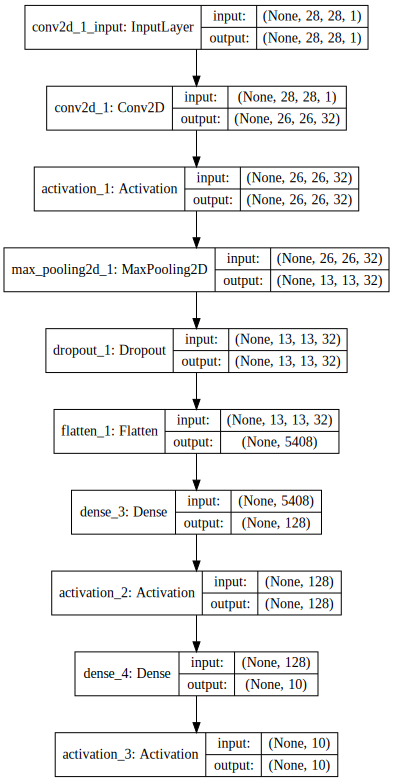

In [72]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(cnn_model, show_shapes=True).create(prog='dot', format='svg'))

**Tips and Tricks**<br/><br/>
In Andrej Karpathy's words, 'don't be a hero', try to use transfer learning and improve upon existing architectures rather than coming up with your own from scratch. <br/><br/>
You need GUPs if you want to work on deep learning. Rent GPU in Amazon or Google cloud compute engine or Azure for training models. It is a good investment to setup your own NVIDIA GPU Machine rather than renting.<br/><br/>
Read a lot of papers. Lot of smart people are working on computer vision research and there are a lot of papers coming out everyday.<br/><br/>
Follow researchers like Andrej Karpathy, Fei Fei Li, Ian GoodFellow, Francois Chollet, etc then twitter recommendation algorithm should recommend researchers similar to that for keeping track of new papers.<br/><br/>
Try implementing algorithms from scratch, it will help you with your understanding.